In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
#ride_data.head(),  city_data.head()

# Combine the data into a single dataset
combined_data = pd.merge(city_data, ride_data, on="city")
# Display the data table for preview
combined_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
organized_data = combined_data[["city", "date", "fare", "ride_id", "driver_count", "type"]]
organized_data.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [3]:
# Let's get some basic throwaway output to warm up with.

# Counts by city
city_count = organized_data["city"].value_counts()
#city_count.head()

# How many cities
number_of_cities = len(organized_data["city"].unique())
#number_of_cities

city_types = organized_data["type"].unique()
#city_types

sum_rides = combined_data["ride_id"].count()


# Check our data for missing rows
#organized_data.count()

In [4]:
#grouped_data_by_city = organized_data.groupby(["city"])
#grouped_data_by_city.mean().head()

#Average Fare per city
#avg_fare_per_city = round(grouped_data_by_city["fare"].mean(), 2)
#avg_fare_per_city.head()
# Rides per city
#rides_per_city = grouped_data_by_city["ride_id"].count().head()
#rides_per_city.head()

#driver_count = organized_data["driver_count"]
#driver_count.head()

# we now have our four plot points, i think:
#print(city_types)
#print(avg_fare_per_city)
#print(rides_per_city)
#print(driver_count)

#driver_df = organized_data["city","driver_count"]
driver_df = organized_data[["city", "driver_count"]]
#driver_df.head()

#Nope. I need to groupby city and city type, don't I?
agg_data_by_city = organized_data.groupby(["type","city"]).aggregate({'ride_id':'count',
                                                                          'fare':'mean',
                                                                          })
agg_data_by_city
agg_data_by_city.sort_index()


ride_id       fare
type     city                                    
Rural    Bradshawfurt               10  40.064000
         Garzaport                   3  24.123333
         Harringtonfort              6  33.470000
         Jessicaport                 6  36.013333
         Lake Jamie                  6  34.358333
         Lake Latoyabury            11  26.061818
         Michaelberg                12  34.997500
         New Ryantown                6  43.278333
         Newtonview                  4  36.745000
         North Holly                 9  29.130000
         North Jaime                 8  30.802500
         Penaborough                 5  35.246000
         Randallchester              5  29.742000
         South Jennifer              7  35.264286
         South Marychester           8  41.870000
         South Saramouth             4  36.160000
         Taylorhaven                 6  42.263333
         West Heather                9  33.890000
Suburban Barronchester              16  36.422500
         Bethanyland                18  32.956111
         Brandonfort                19  35.437368
         Colemanland                22  30.894545
         Davidfurt                  17  31.995882
         East Aaronbury              9  25.661111
         East Danielview            17  31.560588
         East Kentstad              13  29.823077
         East Marymouth             27  30.835185
         Grayville                  15  27.763333
         Josephside                 27  32.858148
         Lake Ann                   12  30.890000
...                                ...        ...
Urban    Port Johnbury              22  23.006364
         Port Samanthamouth         25  25.642800
         Raymondhaven               25  21.480400
         Reynoldsfurt               19  21.919474
         Richardfort                28  22.373214
         Roberthaven                24  23.729167
         Robertport                 20  23.060500
         Rodneyfort                 23  28.616957
         Rogerston                  22  22.097727
         Royland                    30  20.570667
         Simpsonburgh               24  23.355833
         South Evanton              31  26.726129
         South Jack                 19  22.965263
         South Karenland            38  26.535526
         South Latoya               19  20.093158
         South Michelleport         31  24.451613
         South Phillip              31  28.571290
         Valentineton               22  24.636364
         West Angela                39  25.990000
         West Anthony               30  24.736667
         West Christopherberg       26  24.421154
         West Ericstad              18  22.347222
         West Gabriel               23  20.346087
         West Heidi                 28  23.133929
         West Josephberg            26  21.720385
         West Patrickchester        16  28.233125
         West Robert                31  25.123871
         West Samuelburgh           25  21.767600
         Williamsstad               23  24.362174
         Williamsview               20  26.599000

[120 rows x 2 columns]

## Bubble Plot of Ride Sharing Data

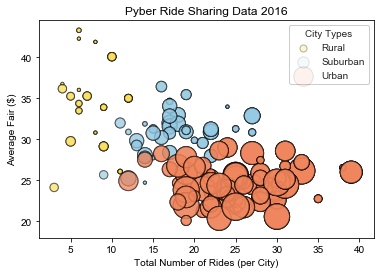

In [5]:
# Obtain the x and y coordinates for each of the three city types

x_limit = agg_data_by_city["ride_id"].max() + 1

agg_df = agg_data_by_city.reset_index()
agg_df = agg_df.rename(columns={"ride_id":"Total Rides",
                        "fare":"Average Fare"
                       })

df = pd.merge(agg_df, driver_df, on="city", how="outer")
#df.head()


#rural_x = pd.Series[df.loc[df['type'] == "Rural"]
rural_x = df.loc[df['type'] == "Rural", 'Total Rides']
suburban_x = df.loc[df['type'] == "Suburban", 'Total Rides']
urban_x = df.loc[df['type'] == "Urban", 'Total Rides']


rural_y = df.loc[df['type'] == "Rural", 'Average Fare']
suburban_y = df.loc[df['type'] == "Suburban", 'Average Fare']
urban_y = df.loc[df['type'] == "Urban", 'Average Fare']

rural_s = df.loc[df['type'] == "Rural", 'driver_count']
suburban_s = df.loc[df['type'] == "Suburban", 'driver_count']
urban_s = df.loc[df['type'] == "Urban", 'driver_count']

bubble_size = 10




# Build the scatter plots for each city types
plt.scatter(rural_x, rural_y, s=rural_s * bubble_size, edgecolors="black", linewidth=1, c="#fade59", alpha=0.3, marker="o", label="Rural")
plt.scatter(suburban_x, suburban_y, s=suburban_s * bubble_size, edgecolors="black", linewidth=1, c="#95cae4", alpha=0.1, marker="o", label="Suburban")
plt.scatter(urban_x, urban_y, s=urban_s * bubble_size, edgecolors="black", linewidth=1, c="#ef865d", alpha=0.1, marker="o", label="Urban")


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (per City)") 
plt.ylabel("Average Fair ($)")

import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Create a legend
plt.legend(framealpha=1, frameon=True, title="City Types")

# Incorporate a text label regarding circle size

# No clue. Can't find docs on this ^^^^ ANYWHERE. Probably because "text label" refers to 
# label properties sca, according to every example on the Internet. No search string for 
# "matplot text label" shows anything that's not related to a specific plot point.


# Save Figure
plt.savefig('Pyber_Ride_Sharing_data-2016.png', bbox_inches='tight')



In [6]:
# Show plot
plt.show()

In [68]:
new_agg_df = organized_data.groupby(["type"]).aggregate({'fare':'sum'})
new_agg_df.sort_index()

total_fares = new_agg_df["fare"].sum()

rural_fares = (new_agg_df.loc["Rural", "fare"] / total_fares) * 100
suburban_fares = (new_agg_df.loc["Suburban", "fare"] / total_fares) * 100
urban_fares = (new_agg_df.loc["Urban", "fare"] / total_fares) * 100





## Total Fares by City Type

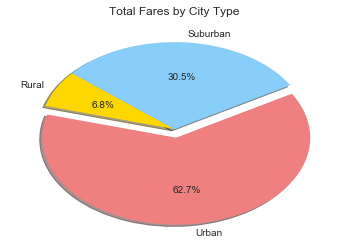

In [69]:
# Calculate Type Percents
#rural_fares = round((rural_y.sum() / sum_rides) * 100, 2)
#urban_fares = round((urban_y.sum() / sum_rides) * 100, 2)
#suburban_fares = round((suburban_x.sum() / sum_rides) * 100, 2)



fares_labels = ["Rural", "Urban", "Suburban"]

# The values of each section of the pie chart
fares = [rural_fares, urban_fares, suburban_fares]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1, 0)

plt.pie(fares, explode=explode, labels=fares_labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Fares by City Type")


# Build Pie Chart

# Save Figure
plt.savefig("Fares_by_city_type.png", bbox_inches="tight")

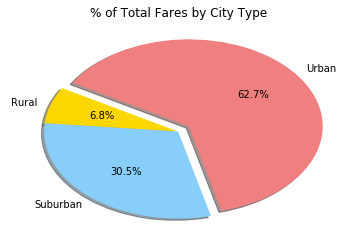

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5,1,'Total Rides by City Type')

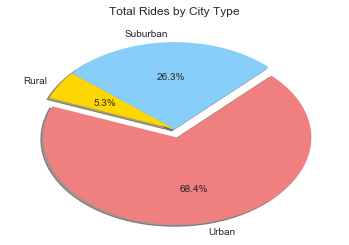

In [24]:
# Calculate Ride Percents
rural_rides = round((rural_x.count() / sum_rides) * 100, 2)
urban_rides = round((urban_x.count() / sum_rides) * 100, 2)
suburban_rides = round((suburban_x.count() / sum_rides) * 100, 2)

# Build Pie Chart
# Labels for the sections of our pie chart
rides_labels = ["Rural", "Urban", "Suburban"]

# The values of each section of the pie chart
rides = [rural_rides, urban_rides, suburban_rides]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1, 0)

plt.pie(rides, explode=explode, labels=rides_labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Rides by City Type")
# Save Figure
plt.savefig("Total_rides_by_city_type.png", bbox_inches="tight")

In [15]:
# Show Figure
plt.show()

## Total Drivers by City Type

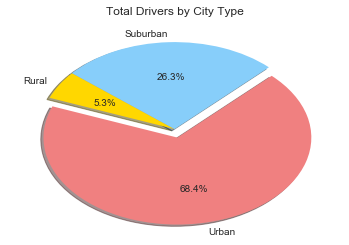

In [32]:
# Calculate Driver Percents
# Calculate Ride Percents
rural_drivers = round((rural_s.count() / sum_rides) * 100, 2)
urban_drivers = round((urban_s.count() / sum_rides) * 100, 2)
suburban_drivers = round((suburban_s.count() / sum_rides) * 100, 2)

# Build Pie Chart
# Labels for the sections of our pie chart
drivers_labels = ["Rural", "Urban", "Suburban"]

# The values of each section of the pie chart
drivers = [rural_drivers, urban_drivers, suburban_drivers]

# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1, 0)

plt.pie(rides, explode=explode, labels=rides_labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Drivers by City Type")
# Save Figure
plt.savefig("Total_drivers_by_city_type.png", bbox_inches="tight")


In [31]:
# Show Figure
plt.show()